<a href="https://colab.research.google.com/github/raphateixeira/Identifica-oLSTM/blob/main/Treinamento_RNA_Bancada_Motor_Gerador_ENIAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Identificação Bancada Motor-Gerador - Artigo ENIAC 2024**


In [1]:
#@title **Bibliotecas**

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

In [2]:
#@title **Clonando github**
!git clone https://github.com/DenilsonUFPA/ENIAC-2024.git

Cloning into 'ENIAC-2024'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 25 (delta 7), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (25/25), 2.38 MiB | 8.37 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [3]:
#@title **Acessando os dados com o github**
dados_git = pd.read_csv('/content/ENIAC-2024/coleta_multinivel_02.csv',sep =',',header=None).to_numpy().T
t = dados_git[:,0]
u = dados_git[:,1]
y = dados_git[:,2]

In [ ]:
#@title **Acessando os dados com o google driver**
# caminho = '/content/drive/MyDrive/Artigo ENIAC/coleta_multinivel_02.csv'

# # Caminho do arquivo CSV
# file_path = caminho
# df = pd.read_csv(file_path, sep=',', header=None).to_numpy().T


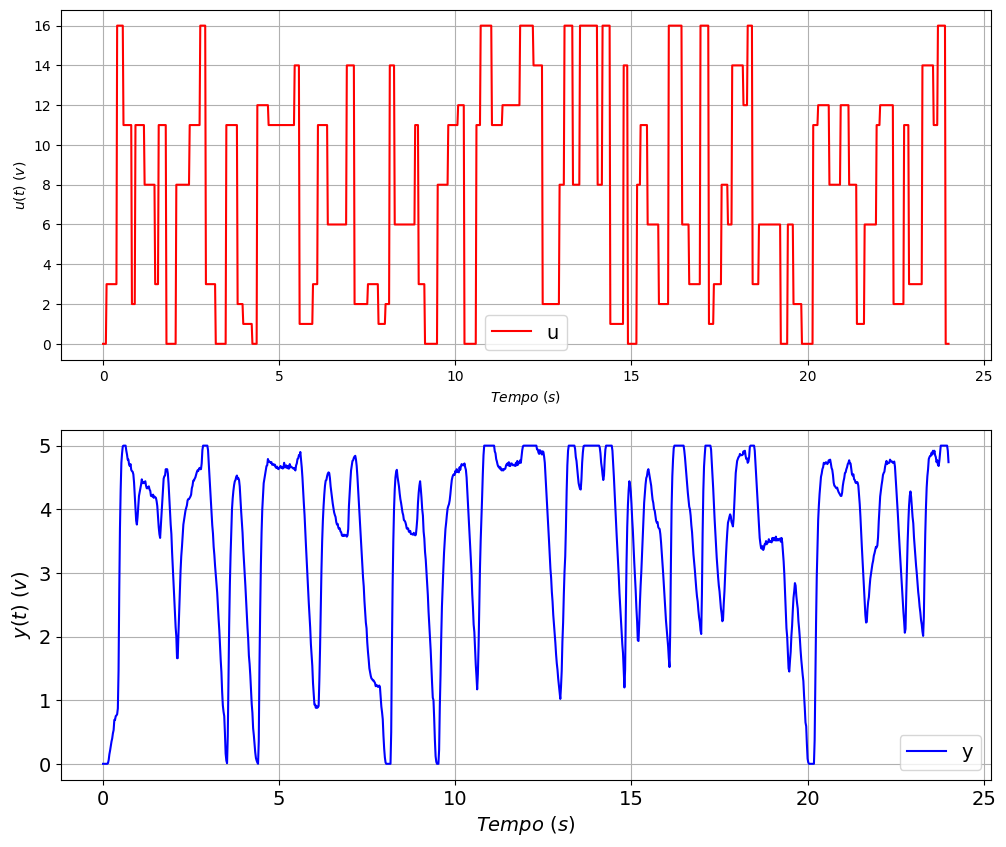

In [4]:
#@title **Dados de entrada e saída da bancada Motor-Gerador**
plt.figure(figsize=(12,10))
plt.subplot(211)
plt.rcParams['font.size'] = 14
plt.plot(t, u,'r',label = 'u')
plt.ylabel("$u(t)$ $(v)$")
plt.xlabel("$Tempo$ $(s)$")
plt.grid()
plt.legend()
plt.subplot(212)
plt.rcParams['font.size'] = 14
plt.plot(t, y,'b',label = 'y')
plt.ylabel("$y(t)$ $(v)$")
plt.xlabel("$Tempo$ $(s)$")
plt.grid()
plt.legend()
plt.savefig('Dados originais.png')
plt.show()

In [5]:
#@title **Normalização dos Dados de Entrada e Saída**

ymax = np.max(y)
umax = np.max(u)

y_norm = y/ymax
u_norm = u/umax


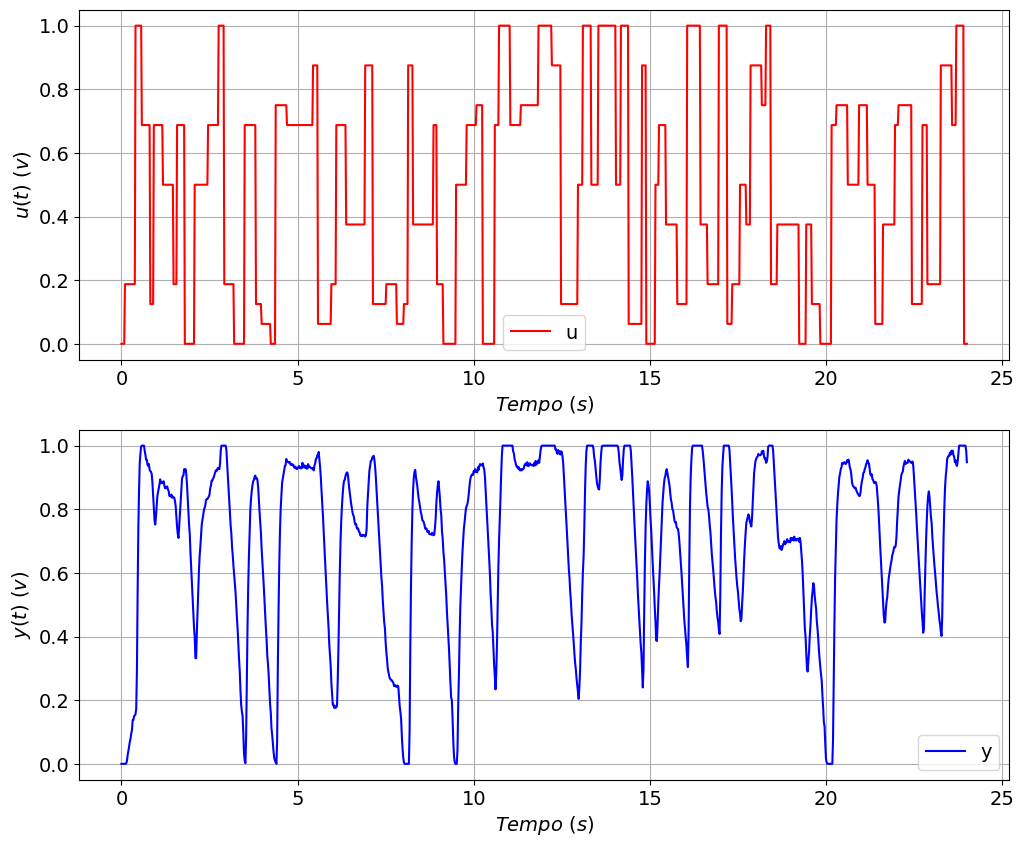

In [7]:
#@title **Dados de entrada e saída da bancada Motor-Gerador normalizados**
plt.figure(figsize=(12,10))
plt.subplot(211)
plt.rcParams['font.size'] = 14
plt.plot(t, u_norm,'r',label = 'u')
plt.ylabel("$u(t)$ $(v)$")
plt.xlabel("$Tempo$ $(s)$")
plt.grid()
plt.legend()
plt.subplot(212)
plt.rcParams['font.size'] = 14
plt.plot(t, y_norm,'b',label = 'y')
plt.ylabel("$y(t)$ $(v)$")
plt.xlabel("$Tempo$ $(s)$")
plt.grid()
plt.legend()
plt.savefig('Dados normalizados.png')
plt.show()

In [8]:
Xs = np.array([u_norm,y_norm]).T
Ys = np.array([y_norm]).T

In [9]:
#@title **Dados de Treinamento e Validação**

percIdent = 0.8
Ni = int(percIdent*len(t))

Xs_train = Xs[0:Ni]
Ys_train = Ys[0:Ni]

Xs_val = Xs[Ni:]
Ys_val = Ys[Ni:]

Xs_val.shape

(241, 2)

In [11]:
Nsi = 5
X_train = []
Y_train = []
for i in np.arange(Nsi,len(Xs_train)):
    X_train.append(Xs_train[i-Nsi:i,:])
    Y_train.append(Ys_train[i])

X_val = []
Y_val = []
for i in np.arange(Nsi,len(Xs_val)):
    X_val.append(Xs_val[i-Nsi:i,:])
    Y_val.append(Ys_val[i])


X_train, Y_train = np.array(X_train), np.array(Y_train)
X_val, Y_val = np.array(X_val), np.array(Y_val)

X_train.shape

(955, 5, 2)

In [12]:
# # Initialize LSTM model
model = Sequential()

model.add(LSTM(units=10, return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=5, return_sequences=True))
model.add(Dropout(0.2))
#model.add(LSTM(units=100))
#model.add(Dropout(0.2))
model.add(Dense(units=Y_train.shape[1])) #units = number of outputs
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Oarada antecipada:
es = EarlyStopping(monitor='loss',mode='min',verbose=1,patience=10)

In [13]:
# Treina modelo LSTM:
import time
t0 = time.time()

DadosTreino = model.fit(X_train, Y_train, epochs = 500, batch_size = 100, verbose=1, validation_data=(X_val, Y_val))
t1 = time.time()
print('Runtime: %.2f s' %(t1-t0))

Epoch 1/500
10/10 [==============================] - 6s 121ms/step - loss: 0.6201 - val_loss: 0.5269
Epoch 2/500
10/10 [==============================] - 0s 11ms/step - loss: 0.5213 - val_loss: 0.4341
Epoch 3/500
10/10 [==============================] - 0s 12ms/step - loss: 0.4259 - val_loss: 0.3481
Epoch 4/500
10/10 [==============================] - 0s 13ms/step - loss: 0.3426 - val_loss: 0.2696
Epoch 5/500
10/10 [==============================] - 0s 13ms/step - loss: 0.2688 - val_loss: 0.2039
Epoch 6/500
10/10 [==============================] - 0s 15ms/step - loss: 0.2124 - val_loss: 0.1584
Epoch 7/500
10/10 [==============================] - 0s 12ms/step - loss: 0.1844 - val_loss: 0.1360
Epoch 8/500
10/10 [==============================] - 0s 13ms/step - loss: 0.1716 - val_loss: 0.1275
Epoch 9/500
10/10 [==============================] - 0s 13ms/step - loss: 0.1636 - val_loss: 0.1225
Epoch 10/500
10/10 [==============================] - 0s 14ms/step - loss: 0.1620 - val_loss: 0.118

In [14]:
# Predição com dados de treinamento e de validação:
Yp_train = model.predict(X_train)
Yp_val = model.predict(X_val)

8/8 [==============================] - 0s 5ms/step


ValueError: x and y can be no greater than 2D, but have shapes (955,) and (955, 5, 1)

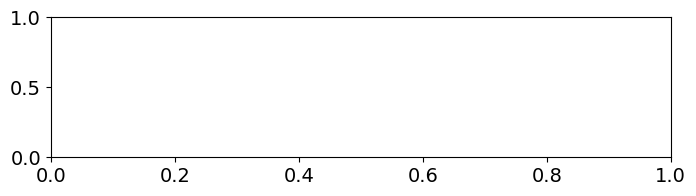

In [15]:
plt.figure(0, figsize=(8,4))
plt.subplot(211)
plt.plot(Yp_train[0:],'r-',label='LSTM - Data Train')
plt.plot(Y_train[0:],'b--',label='Real - Data Train')
plt.legend(loc="lower right")
plt.grid()

plt.subplot(212)
plt.plot(Yp_val[0:],'r-',label='LSTM - Validation Data ')
plt.plot(Y_val[0:],'b--',label='Real - Validation Data')
plt.ylim((0,5))
plt.legend(loc="lower right")
plt.grid()
plt.savefig('teste.png')
plt.show()

In [ ]:
from sklearn.metrics import r2_score as AjusteR2

print('AJuste de treinamento = ', AjusteR2(Yp_train,Y_train).round(4))
print('AJuste de validação = ', AjusteR2(Yp_val,Y_val).round(4))

AJuste de treinamento =  0.9904
AJuste de validação =  0.9903


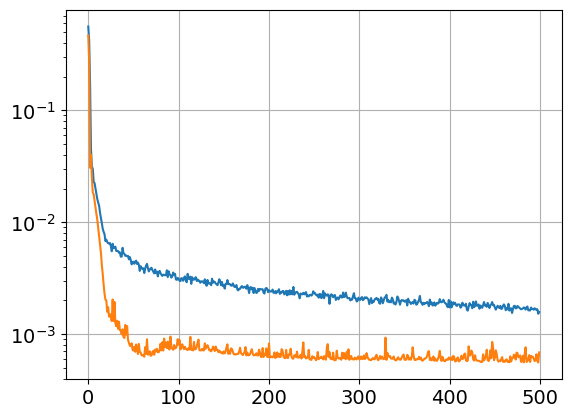

In [ ]:

plt.semilogy(DadosTreino.history['loss'])
plt.semilogy(DadosTreino.history['val_loss'])
plt.grid()
plt.savefig('loss.png')
plt.show()

In [ ]:
#@title **Salvando os Modelos (h5)**
model.save('model_1_passos.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#@title **Salvando o modelo (keras)**
model.save('Modelo2.keras')

In [ ]:
#@title **Salvando Resultados**

import joblib
joblib.dump(DadosTreino.history,'resultado__1_passos.joblib')

['resultado__1_passos.joblib']

In [ ]:
#@title **Carregando Resultados**

# resultado1_save = joblib.load('resultado1_salve.joblib')